In this assignment I will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [4]:
import numpy as np
import pandas as pd

Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?


In [5]:
def task_one():
    df = pd.read_csv('fraud_data.csv')
    y = df.iloc[:,-1]
    ans = y.value_counts()
    return ans[1]/(ans[0]+ans[1])
task_one()

0.016410823768035772

In [6]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [7]:
def task_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score
    
    dum_clf = DummyClassifier(strategy='most_frequent')
    dum_clf.fit(X_train, y_train)
    
    return dum_clf.score(X_test, y_test), recall_score(y_test, dum_clf.predict(X_test))
    
    
task_two()

(0.9852507374631269, 0.0)

In [10]:
def naive_bayes():
    from sklearn.naive_bayes import GaussianNB
    from sklearn.metrics import recall_score, precision_score
    
    nb_clf = GaussianNB()
    nb_clf.fit(X_train, y_train)
    
    return nb_clf.score(X_test, y_test), recall_score(y_test, nb_clf.predict(X_test)), precision_score(y_test, nb_clf.predict(X_test))
naive_bayes()

(0.9743731563421829, 0.8375, 0.3471502590673575)


Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [11]:
def task_three():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC

    svc_clf = SVC()
    svc_clf.fit(X_train, y_train)
    
    return svc_clf.score(X_test, y_test), recall_score(y_test, svc_clf.predict(X_test)), precision_score(y_test, svc_clf.predict(X_test))
task_three()

(0.9907817109144543, 0.375, 1.0)


Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [12]:
def task_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    svc_clf = SVC(C=1e9, gamma=1e-07)
    svc_clf.fit(X_train, y_train)
    y_pred = svc_clf.decision_function(X_test) > -220
    return confusion_matrix(y_test, y_pred)
task_four()

array([[5320,   24],
       [  14,   66]])


Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

<IPython.core.display.Javascript object>


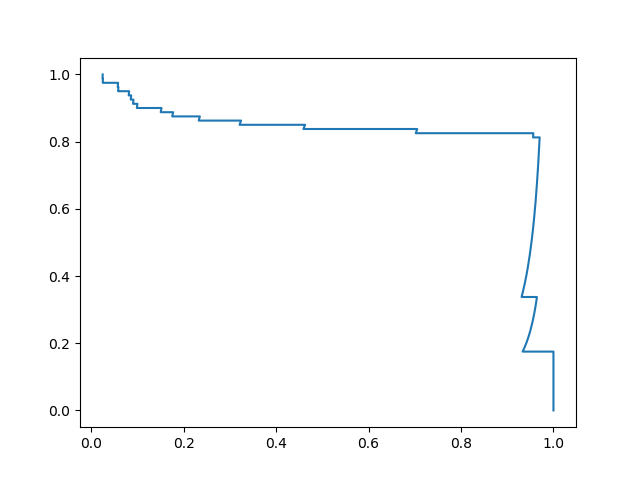

<IPython.core.display.Javascript object>


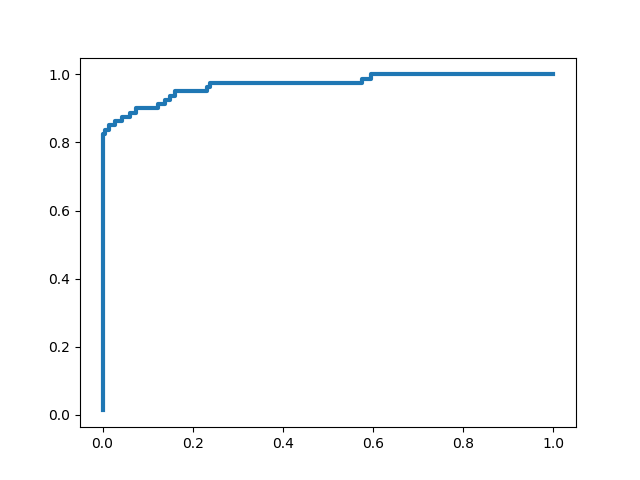

(0.825, 0.95)

In [16]:
def task_five():
        
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve, roc_curve
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt

    

    lr_clf = LogisticRegression()
    y_pred = lr_clf.fit(X_train, y_train).decision_function(X_test)
    
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred)
    
    plt.figure()
    plt.plot(precision, recall, label='Precision-Recall Curve')
    #print(ax[0].get_xdata())
    recall_ans = np.interp(0.75, precision, recall)
    plt.figure()
    plt.plot(fpr_lr, tpr_lr, lw=3)
    tpr_ans = np.interp(0.16, fpr_lr, tpr_lr)
    
    return recall_ans, tpr_ans
task_five()


Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 


In [14]:
def task_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    lr_clf = LogisticRegression()
    grid_values = {'penalty': ['l1', 'l2'], 'C':[0.01, 0.1, 1, 10, 100]}
    grid_clf_acc = GridSearchCV(lr_clf, param_grid = grid_values, scoring='recall')
    grid_clf_acc.fit(X_train, y_train)
    
    return grid_clf_acc.cv_results_['mean_test_score'].reshape(5,2)
task_six()

array([[0.66666667, 0.76086957],
       [0.80072464, 0.80434783],
       [0.8115942 , 0.8115942 ],
       [0.80797101, 0.8115942 ],
       [0.80797101, 0.80797101]])

<IPython.core.display.Javascript object>


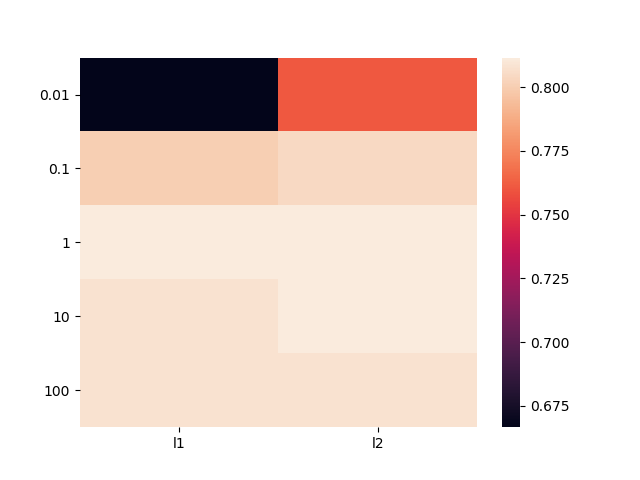

In [18]:
# Using the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

GridSearch_Heatmap(task_six())